Importing Libraries

In [14]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Reading Image in GrayScale

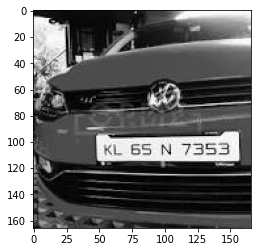

In [15]:
image = cv2.imread('image10.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))   #This is because matplotib expects the image in RGB format


Noise Removal and Edge Detection

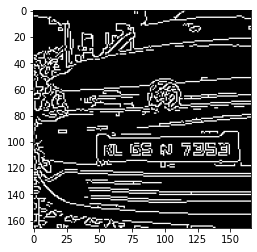

In [16]:
Noise = cv2.bilateralFilter(gray_image, 11, 17, 15) 
edge = cv2.Canny(Noise, 30, 200)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

# It becomes evident that where our number plate is!

Finding Contours

In [17]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]  #Sorting the 10 contours in descending order 

In [18]:
# Checking the four points which forms a rectangle

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 15, True)
    if len(approx) == 4:
        location = approx
        break

In [19]:
#   Getting the co-ordinates of the number plate

location

array([[[156,  93]],

       [[155, 115]],

       [[ 48, 112]],

       [[ 50,  94]]], dtype=int32)

Applying Masking (So that we can see the number plate clearly)

In [20]:
mask = np.zeros(gray_image.shape, np.uint8) # Creating a mask of the excat same size of gray_image. 
contour_img = cv2.drawContours(mask, [location], 0,255, -2)  # Applying white colour to the contour to make it visible
contour_img = cv2.bitwise_and(image, image, mask=mask)   #Overlaying the mask on original image

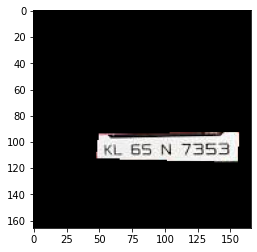

In [21]:
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))

Cropping the Number Plate

In [22]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_image[x1:x2, y1:y2]

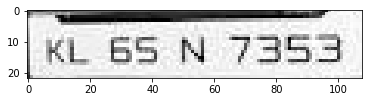

In [23]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [24]:
txt_reader = easyocr.Reader(['en'])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [25]:
import numpy

In [26]:
result = txt_reader.readtext(cropped_image)
result

[([[5, 5], [105, 5], [105, 21], [5, 21]], 'KL 65 N 7353', 0.9309056660505889)]